In [ ]:
%matplotlib widget

In [ ]:
from crank_nicolson_2d import *

In [ ]:
import numpy as np

In [ ]:
import scipy as sp

In [ ]:
def tunnelCase(position, where, width, potential = 1): 
    return np.where(
            (position.x > where) & (position.x < (where + width)), 
            potential, 
            0, 
        )

In [ ]:
def hydrogenAtom(position, potential, bottom = 1): 
    return potential / np.sqrt(
            (position.x / 2) ** 2 \
            + (position.y / 2) ** 2 \
            + bottom ** 2 \
        )

In [ ]:
def doubleSlit(position, where, width, slitHeight, gapHeight, potential = 1, math=np): 
    totalY = math.max(position.y)
    return math.where(
            (position.x > where) & (position.x < (where + width)) 
                    & ( \
                            (position.y > ((totalY / 2) + (gapHeight + slitHeight))) \
                            | (position.y < ((totalY / 2) - (gapHeight + slitHeight))) \
                            | ( \
                               (position.y > ((totalY / 2) - gapHeight)) \
                               & (position.y < ((totalY / 2) + gapHeight)) \
                              )
                      ), 
            potential, 
            0, 
        )

In [8]:
spatialStep : float = 1e-2
temporalStep : float = (spatialStep ** 2) / 4
courantNumber : float = 1.0
pointCount : int = int(1 / spatialStep)
print(pointCount)
assert (temporalStep / spatialStep) <= courantNumber
profile = SimulationProfile(
        makeLinspaceGrid(pointCount, 1, 2, False, float, np), 
        lambda position : makeWavePacket(position, .8, 0.5, spatialStep, .05, 15 * np.pi, np), 
        lambda position, time : doubleSlit(position, .4, .1, .05, .0125, 20000), 
        temporalStep, 
        spatialStep, 
        False, 
        True
    )
simulator = Simulator(profile)
simulator.simulate(500, False)
probabilities, probabilityDecibles = simulator.processProbabilities()

100


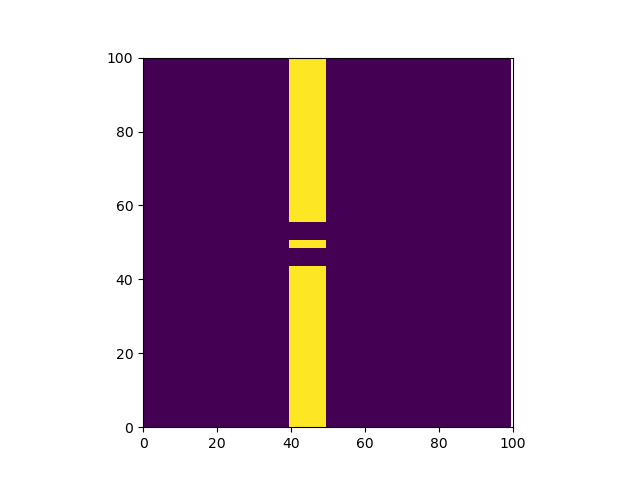

In [9]:
potentialAnimation = animateImages(pointCount, simulator.potentials)

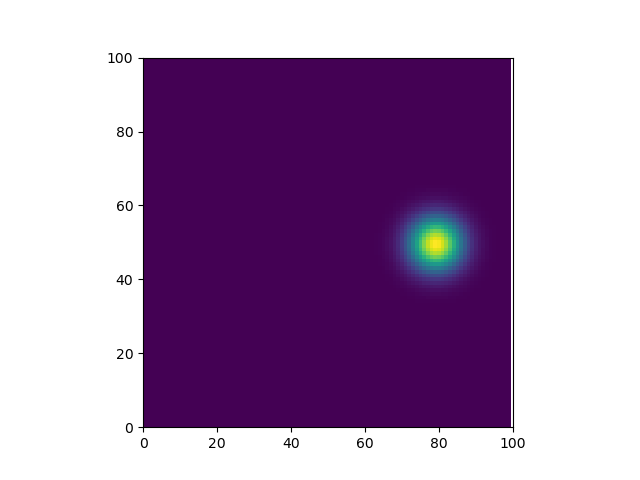

In [10]:
waveAnimation = animateImages(pointCount, simulator.probabilities, interval = 50)

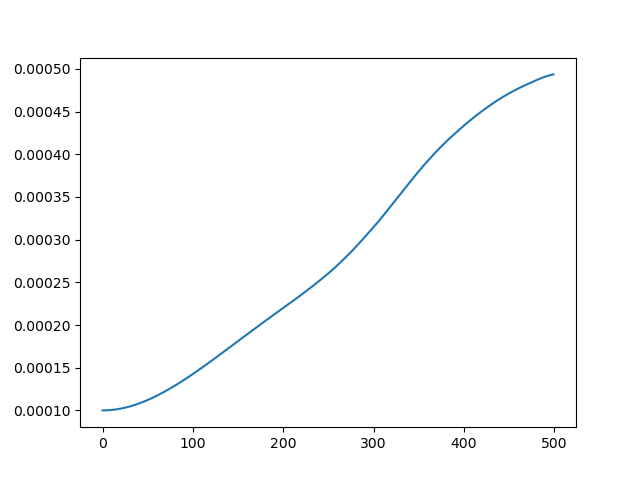

In [11]:
plt.figure()
plt.plot([np.sum(probabilities) * (spatialStep ** 2) for probabilities in simulator.probabilities])

In [12]:
#results = np.array([sp.integrate.simps(sp.integrate.simps(((psi.real ** 2) + (psi.imag ** 2)), dx=spatialStep), dx=spatialStep) for psi in simulator.waveFunctions])

In [13]:
#value seems to be conserved though it is not 1

In [14]:
integrated = [(spatialStep ** 2) * np.sum(np.sum((psi.real ** 2) + (psi.imag ** 2))) for psi in simulator.waveFunctions]

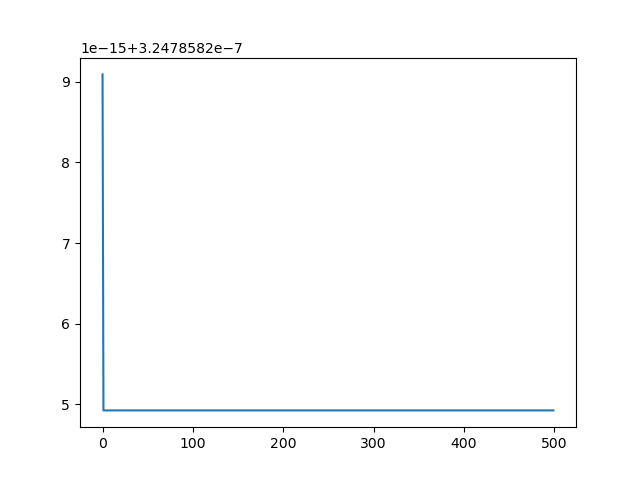

In [15]:
plt.figure()
plt.plot(integrated)

In [16]:
integrated

[3.2478582909102925e-07,
 3.2478582492516393e-07,
 3.24785824925164e-07,
 3.2478582492516404e-07,
 3.24785824925164e-07,
 3.2478582492516404e-07,
 3.247858249251641e-07,
 3.2478582492516404e-07,
 3.2478582492516404e-07,
 3.2478582492516404e-07,
 3.247858249251641e-07,
 3.2478582492516414e-07,
 3.247858249251641e-07,
 3.247858249251641e-07,
 3.2478582492516414e-07,
 3.2478582492516414e-07,
 3.2478582492516414e-07,
 3.2478582492516414e-07,
 3.2478582492516414e-07,
 3.247858249251642e-07,
 3.2478582492516414e-07,
 3.247858249251642e-07,
 3.247858249251642e-07,
 3.2478582492516414e-07,
 3.247858249251642e-07,
 3.247858249251642e-07,
 3.2478582492516425e-07,
 3.247858249251642e-07,
 3.247858249251643e-07,
 3.2478582492516425e-07,
 3.247858249251642e-07,
 3.247858249251642e-07,
 3.247858249251642e-07,
 3.247858249251642e-07,
 3.247858249251642e-07,
 3.247858249251642e-07,
 3.2478582492516425e-07,
 3.247858249251642e-07,
 3.247858249251642e-07,
 3.2478582492516425e-07,
 3.2478582492516425e-07

In [17]:
np.sum(simulator.probabilities[0])

1.0

In [18]:
np.max(simulator.probabilities[0])

0.006457261127507643

In [19]:

np.sum(simulator.probabilities[1])

1.0000274720621425

In [20]:
np.sum(simulator.probabilities[-1])

4.935560703518067

In [21]:
np.max(simulator.probabilities[-1])

0.0029596418192155195

<Figure size 640x480 with 0 Axes>

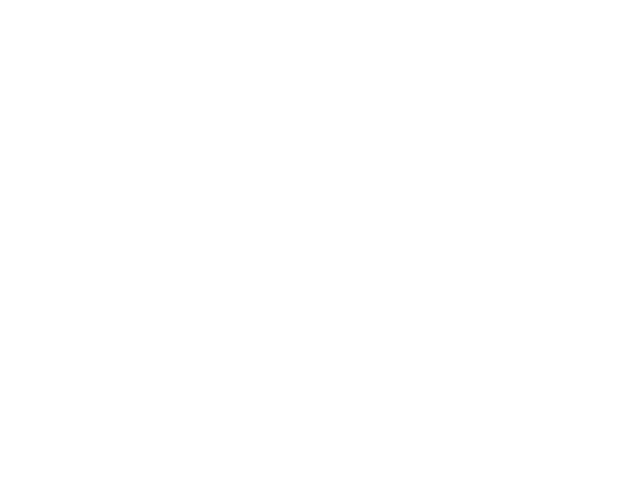

In [22]:
plt.figure()

In [23]:
plt.plot([np.max(probabilitySet) for probabilitySet in simulator.probabilities])

In [24]:
#waveAnimation.save("low_res_slit_0.mp4")